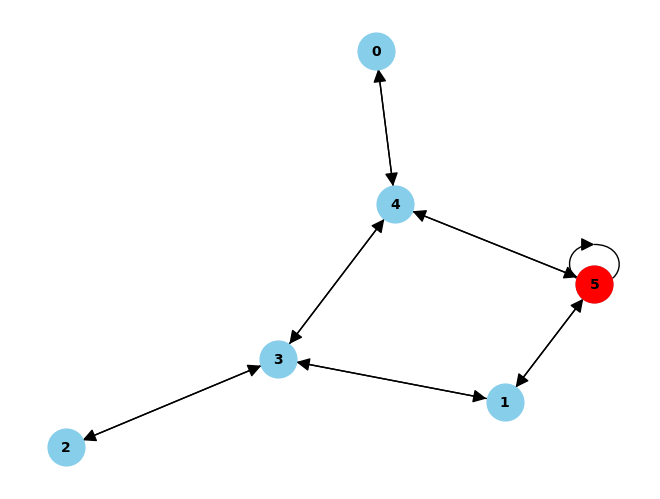

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes
G.add_nodes_from(range(6))

# Add edges based on your description
edges = [(1, 3), (1, 5), (2, 3), (0, 4), (4, 0), (3, 2), (3, 1), (5, 1), (3,4), (4, 3), (4, 5), (5, 4), (5, 5)]
G.add_edges_from(edges)

# Specify node 5 as the destination
destination_node = 5

# Visualize the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=10, font_color="black", font_weight="bold", arrowsize=20)

# Highlight the destination node
nx.draw_networkx_nodes(G, pos, nodelist=[destination_node], node_color="red", node_size=700)

# Show the graph
plt.show()


In [5]:
import numpy as np
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Add nodes
G.add_nodes_from(range(6))

# Updated edges based on your description
edges = [(1, 3), (1, 5), (2, 3), (0, 4), (4, 0), (3, 2), (3, 1), (5, 1), (3, 4), (4, 3), (4, 5), (5, 4), (5, 5)]
G.add_edges_from(edges)

# Get the adjacency matrix
adjacency_matrix = nx.adjacency_matrix(G).todense()

# Initialize the reward matrix with -1 as null values
reward_matrix = np.full_like(adjacency_matrix, -1, dtype=float)

# Update the reward matrix based on existing edges
for edge in edges:
    start_node, end_node = edge
    action_column = end_node
    state_row = start_node
    if (start_node, end_node) in [(1, 5), (4, 5), (5, 5)]:
        reward_matrix[state_row, action_column] = 100
    else:
        reward_matrix[state_row, action_column] = 0

print("Reward Matrix:")
print(reward_matrix)


Reward Matrix:
[[ -1.  -1.  -1.  -1.   0.  -1.]
 [ -1.  -1.  -1.   0.  -1. 100.]
 [ -1.  -1.  -1.   0.  -1.  -1.]
 [ -1.   0.   0.  -1.   0.  -1.]
 [  0.  -1.  -1.   0.  -1. 100.]
 [ -1.   0.  -1.  -1.   0. 100.]]


In [6]:
import numpy as np

# Define the number of states and actions
num_states = 6  # Assuming there are 6 nodes in your graph
num_actions = 6  # Assuming each node has an action to move to any other node

# Initialize the Q-matrix with zeros
Q_matrix = np.zeros((num_states, num_actions))

# Print the initial Q-matrix
print("Initial Q-matrix:")
print(Q_matrix)


Initial Q-matrix:
[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


In [8]:
import random

# Number of episodes (you can adjust this based on your requirements)
num_episodes = 1000

# Q-learning parameters
learning_rate = 0.8
discount_factor = 0.8

# Q-learning algorithm
for episode in range(num_episodes):
    # Randomly select a starting state
    current_state = random.randint(0, num_states - 1)

    # Perform Q-value updates until reaching the goal state
    while current_state != destination_node:
        # Randomly select an action for the current state
        action_taken = random.randint(0, num_actions - 1)

        # Get the next state (assuming a deterministic environment)
        next_state = action_taken

        # Update Q-value for the current state-action pair
        Q_matrix[current_state, action_taken] = reward_matrix[current_state, action_taken] + \
                                               learning_rate * discount_factor * np.max(Q_matrix[next_state, :])

        # Move to the next state
        current_state = next_state

# Print the final Q-matrix after training
print("Final Q-matrix:")
print(Q_matrix)


Final Q-matrix:
[[ 63.   79.   62.2  63.   80.   -1. ]
 [ 63.   79.   62.2  64.   79.  100. ]
 [ 63.   79.   62.2  64.   79.   -1. ]
 [ 63.   80.   63.2  63.   80.   -1. ]
 [ 64.   79.   62.2  64.   79.  100. ]
 [  0.    0.    0.    0.    0.    0. ]]


In [ ]:
import random
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# ... (previous code for graph, reward_matrix, etc.)

# Number of episodes (you can adjust this based on your requirements)
num_episodes = 1000

# Q-learning parameters
learning_rate = 0.8
discount_factor = 0.8

# Initialize the Q-matrix with zeros
Q_matrix = np.zeros((num_states, num_actions))

# List to store the Q-matrix after each episode
q_matrix_episodes = []

# Q-learning algorithm
for episode in range(num_episodes):
    # Randomly select a starting state
    current_state = random.randint(0, num_states - 1)

    # Continue until reaching the goal state
    while current_state != destination_node:
        # Randomly select an action for the current state
        action_taken = random.randint(0, num_actions - 1)

        # Get the next state (assuming a deterministic environment)
        next_state = action_taken

        # Update Q-value for the current state-action pair
        Q_matrix[current_state, action_taken] = (1 - learning_rate) * Q_matrix[current_state, action_taken] + \
                                                 learning_rate * (reward_matrix[current_state, action_taken] +
                                                                 discount_factor * np.max(Q_matrix[next_state, :]))

        # Move to the next state
        current_state = next_state

    # Append a copy of the Q-matrix after the episode for visualization
    q_matrix_episodes.append(np.copy(Q_matrix))

# Plot Q-matrix for a subset of episodes
num_episodes_to_plot = min(num_episodes, 50)
plot_step_size = max(num_episodes // num_episodes_to_plot, 1)

fig, axes = plt.subplots(nrows=num_episodes_to_plot//5, ncols=5, figsize=(15, 15), sharex=True, sharey=True)

for i in range(num_episodes_to_plot):
    if i % plot_step_size == 0:
        ax = axes[i // 5, i % 5]
        episode_idx = i
        ax.imshow(q_matrix_episodes[episode_idx], cmap='viridis', aspect='auto')
        ax.set_title(f'Episode {episode_idx}')
        ax.set_xticks(range(num_actions))
        ax.set_yticks(range(num_states))
        ax.set_xlabel('Action')
        ax.set_ylabel('State')

plt.tight_layout()
plt.show()


In [10]:
# Find the best path using the learned Q-matrix
current_state = 1  # Starting state (you can choose any starting state)

path = [current_state]

while current_state != destination_node:
    # Choose the action with the highest Q-value
    action_taken = np.argmax(Q_matrix[current_state, :])

    # Get the next state based on the chosen action
    next_state = action_taken

    # Add the next state to the path
    path.append(next_state)

    # Move to the next state
    current_state = next_state

# Print the best path
print("Best path to destination:", path)


Best path to destination: [1, 5]


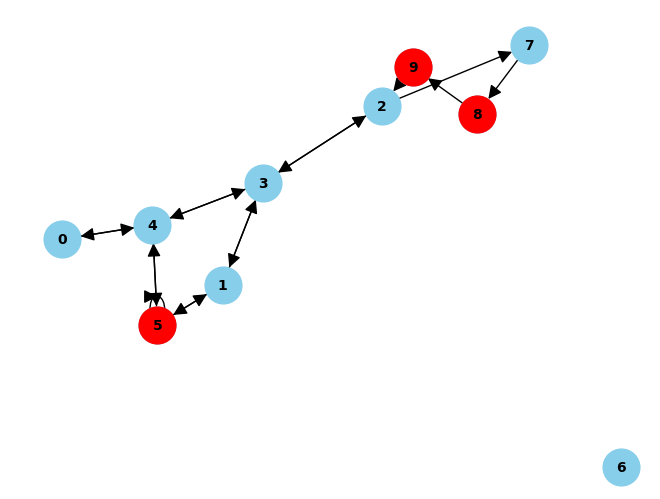

Best path to one of the destinations: [9]


In [11]:
import random
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes
num_nodes = 10
G.add_nodes_from(range(num_nodes))

# Add edges based on your description
edges = [(1, 3), (1, 5), (2, 3), (0, 4), (4, 0), (3, 2), (3, 1), (5, 1), (3, 4), (4, 3), (4, 5), (5, 4), (5, 5),
         (2, 7), (7, 8), (8, 9), (9, 2)]
G.add_edges_from(edges)

# Specify destination nodes
destination_nodes = [5, 9, 8]

# Get the adjacency matrix
adjacency_matrix = nx.adjacency_matrix(G).todense()

# Initialize the reward matrix with -1 as null values
reward_matrix = np.full_like(adjacency_matrix, -1, dtype=float)

# Update the reward matrix based on existing edges
for edge in edges:
    start_node, end_node = edge
    action_column = end_node
    state_row = start_node
    if end_node in destination_nodes:
        reward_matrix[state_row, action_column] = 100
    else:
        reward_matrix[state_row, action_column] = 0

# Visualize the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=10, font_color="black", font_weight="bold", arrowsize=20)
nx.draw_networkx_nodes(G, pos, nodelist=destination_nodes, node_color="red", node_size=700)
plt.show()

# Define the number of states and actions
num_states = num_nodes
num_actions = num_nodes

# Initialize the Q-matrix with zeros
Q_matrix = np.zeros((num_states, num_actions))

# Number of episodes (you can adjust this based on your requirements)
num_episodes = 1000

# Q-learning parameters
learning_rate = 0.8
discount_factor = 0.8

# List to store the Q-matrix after each episode
q_matrix_episodes = []

# Q-learning algorithm
for episode in range(num_episodes):
    # Randomly select a starting state
    current_state = random.randint(0, num_states - 1)

    # Continue until reaching one of the destination states
    while current_state not in destination_nodes:
        # Randomly select an action for the current state
        action_taken = random.randint(0, num_actions - 1)

        # Get the next state (assuming a deterministic environment)
        next_state = action_taken

        # Update Q-value for the current state-action pair
        Q_matrix[current_state, action_taken] = (1 - learning_rate) * Q_matrix[current_state, action_taken] + \
                                                 learning_rate * (reward_matrix[current_state, action_taken] +
                                                                 discount_factor * np.max(Q_matrix[next_state, :]))

        # Move to the next state
        current_state = next_state

    # Append a copy of the Q-matrix after the episode for visualization
    q_matrix_episodes.append(np.copy(Q_matrix))

# Find the best path to one of the destination nodes
current_state = random.randint(0, num_states - 1)  # Starting state
path = [current_state]

while current_state not in destination_nodes:
    # Choose the action with the highest Q-value
    action_taken = np.argmax(Q_matrix[current_state, :])

    # Get the next state based on the chosen action
    next_state = action_taken

    # Add the next state to the path
    path.append(next_state)

    # Move to the next state
    current_state = next_state

# Print the best path
print("Best path to one of the destinations:", path)


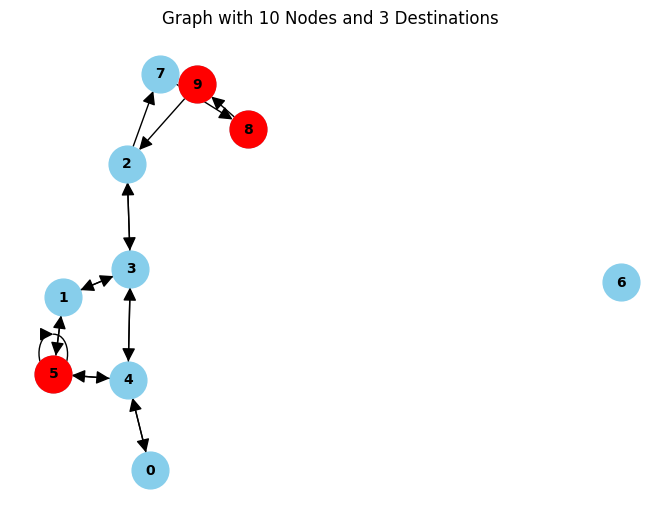

Best path to one of the destinations: [6, 1, 5]


In [12]:
import random
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes
num_nodes = 10
G.add_nodes_from(range(num_nodes))

# Add edges based on your description
edges = [(1, 3), (1, 5), (2, 3), (0, 4), (4, 0), (3, 2), (3, 1), (5, 1), (3, 4), (4, 3), (4, 5), (5, 4), (5, 5),
         (2, 7), (7, 8), (8, 9), (9, 2)]
G.add_edges_from(edges)

# Specify destination nodes
destination_nodes = [5, 9, 8]

# Get the adjacency matrix
adjacency_matrix = nx.adjacency_matrix(G).todense()

# Initialize the reward matrix with -1 as null values
reward_matrix = np.full_like(adjacency_matrix, -1, dtype=float)

# Update the reward matrix based on existing edges
for edge in edges:
    start_node, end_node = edge
    action_column = end_node
    state_row = start_node
    if end_node in destination_nodes:
        reward_matrix[state_row, action_column] = 100
    else:
        reward_matrix[state_row, action_column] = 0

# Visualize the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=10, font_color="black", font_weight="bold", arrowsize=20)
nx.draw_networkx_nodes(G, pos, nodelist=destination_nodes, node_color="red", node_size=700)
plt.title("Graph with 10 Nodes and 3 Destinations")
plt.show()

# Define the number of states and actions
num_states = num_nodes
num_actions = num_nodes

# Initialize the Q-matrix with zeros
Q_matrix = np.zeros((num_states, num_actions))

# Number of episodes (you can adjust this based on your requirements)
num_episodes = 1000

# Q-learning parameters
learning_rate = 0.8
discount_factor = 0.8

# List to store the Q-matrix after each episode
q_matrix_episodes = []

# Q-learning algorithm
for episode in range(num_episodes):
    # Randomly select a starting state
    current_state = random.randint(0, num_states - 1)

    # Continue until reaching one of the destination states
    while current_state not in destination_nodes:
        # Randomly select an action for the current state
        action_taken = random.randint(0, num_actions - 1)

        # Get the next state (assuming a deterministic environment)
        next_state = action_taken

        # Update Q-value for the current state-action pair
        Q_matrix[current_state, action_taken] = (1 - learning_rate) * Q_matrix[current_state, action_taken] + \
                                                 learning_rate * (reward_matrix[current_state, action_taken] +
                                                                 discount_factor * np.max(Q_matrix[next_state, :]))

        # Move to the next state
        current_state = next_state

    # Append a copy of the Q-matrix after the episode for visualization
    q_matrix_episodes.append(np.copy(Q_matrix))

# Find the best path to one of the destination nodes
current_state = random.randint(0, num_states - 1)  # Starting state
path = [current_state]

while current_state not in destination_nodes:
    # Choose the action with the highest Q-value
    action_taken = np.argmax(Q_matrix[current_state, :])

    # Get the next state based on the chosen action
    next_state = action_taken

    # Add the next state to the path
    path.append(next_state)

    # Move to the next state
    current_state = next_state

# Print the best path
print("Best path to one of the destinations:", path)


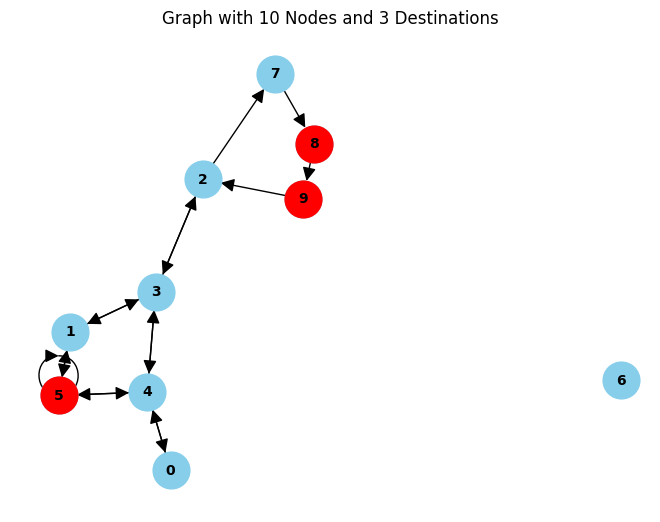

Reward Matrix:
[[ -1.  -1.  -1.  -1.   0.  -1.  -1.  -1.  -1.  -1.]
 [ -1.  -1.  -1.   0.  -1. 100.  -1.  -1.  -1.  -1.]
 [ -1.  -1.  -1.   0.  -1.  -1.  -1.   0.  -1.  -1.]
 [ -1.   0.   0.  -1.   0.  -1.  -1.  -1.  -1.  -1.]
 [  0.  -1.  -1.   0.  -1. 100.  -1.  -1.  -1.  -1.]
 [ -1.   0.  -1.  -1.   0. 100.  -1.  -1.  -1.  -1.]
 [ -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.]
 [ -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1. 100.  -1.]
 [ -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1. 100.]
 [ -1.  -1.   0.  -1.  -1.  -1.  -1.  -1.  -1.  -1.]]

Final Q-matrix:
[[ 63.   79.   63.   63.   80.   -1.   62.2  79.   -1.   -1. ]
 [ 63.   79.   63.   64.   79.  100.   62.2  79.   -1.   -1. ]
 [ 63.   79.   63.   64.   79.   -1.   62.2  80.   -1.   -1. ]
 [ 63.   80.   64.   63.   80.   -1.   62.2  79.   -1.   -1. ]
 [ 64.   79.   63.   64.   79.  100.   62.2  79.   -1.   -1. ]
 [  0.    0.    0.    0.    0.    0.    0.    0.    0.    0. ]
 [ 63.   79.   63.   63.   79.   -1.   62.2  79.   -1.   -1

In [13]:
import random
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes
num_nodes = 10
G.add_nodes_from(range(num_nodes))

# Add edges based on your description
edges = [(1, 3), (1, 5), (2, 3), (0, 4), (4, 0), (3, 2), (3, 1), (5, 1), (3, 4), (4, 3), (4, 5), (5, 4), (5, 5),
         (2, 7), (7, 8), (8, 9), (9, 2)]
G.add_edges_from(edges)

# Specify destination nodes
destination_nodes = [5, 9, 8]

# Get the adjacency matrix
adjacency_matrix = nx.adjacency_matrix(G).todense()

# Initialize the reward matrix with -1 as null values
reward_matrix = np.full_like(adjacency_matrix, -1, dtype=float)

# Update the reward matrix based on existing edges
for edge in edges:
    start_node, end_node = edge
    action_column = end_node
    state_row = start_node
    if end_node in destination_nodes:
        reward_matrix[state_row, action_column] = 100
    else:
        reward_matrix[state_row, action_column] = 0

# Visualize the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=10, font_color="black", font_weight="bold", arrowsize=20)
nx.draw_networkx_nodes(G, pos, nodelist=destination_nodes, node_color="red", node_size=700)
plt.title("Graph with 10 Nodes and 3 Destinations")
plt.show()

# Print the reward matrix
print("Reward Matrix:")
print(reward_matrix)

# Define the number of states and actions
num_states = num_nodes
num_actions = num_nodes

# Initialize the Q-matrix with zeros
Q_matrix = np.zeros((num_states, num_actions))

# Number of episodes (you can adjust this based on your requirements)
num_episodes = 1000

# Q-learning parameters
learning_rate = 0.8
discount_factor = 0.8

# List to store the Q-matrix after each episode
q_matrix_episodes = []

# Q-learning algorithm
for episode in range(num_episodes):
    # Randomly select a starting state
    current_state = random.randint(0, num_states - 1)

    # Continue until reaching one of the destination states
    while current_state not in destination_nodes:
        # Randomly select an action for the current state
        action_taken = random.randint(0, num_actions - 1)

        # Get the next state (assuming a deterministic environment)
        next_state = action_taken

        # Update Q-value for the current state-action pair
        Q_matrix[current_state, action_taken] = (1 - learning_rate) * Q_matrix[current_state, action_taken] + \
                                                 learning_rate * (reward_matrix[current_state, action_taken] +
                                                                 discount_factor * np.max(Q_matrix[next_state, :]))

        # Move to the next state
        current_state = next_state

    # Append a copy of the Q-matrix after the episode for visualization
    q_matrix_episodes.append(np.copy(Q_matrix))

# Print the final Q-matrix after training
print("\nFinal Q-matrix:")
print(Q_matrix)

# Find the best path to one of the destination nodes
current_state = random.randint(0, num_states - 1)  # Starting state
path = [current_state]

while current_state not in destination_nodes:
    # Choose the action with the highest Q-value
    action_taken = np.argmax(Q_matrix[current_state, :])

    # Get the next state based on the chosen action
    next_state = action_taken

    # Add the next state to the path
    path.append(next_state)

    # Move to the next state
    current_state = next_state

# Print the best path
print("\nBest path to one of the destinations:", path)


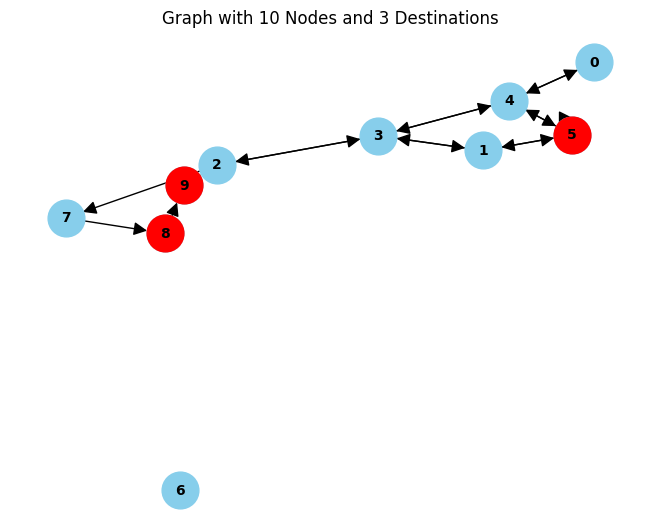

Reward Matrix:
[[ -1.  -1.  -1.  -1.   0.  -1.  -1.  -1.  -1.  -1.]
 [ -1.  -1.  -1.   0.  -1. 100.  -1.  -1.  -1.  -1.]
 [ -1.  -1.  -1.   0.  -1.  -1.  -1.   0.  -1.  -1.]
 [ -1.   0.   0.  -1.   0.  -1.  -1.  -1.  -1.  -1.]
 [  0.  -1.  -1.   0.  -1. 100.  -1.  -1.  -1.  -1.]
 [ -1.   0.  -1.  -1.   0. 100.  -1.  -1.  -1.  -1.]
 [ -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.]
 [ -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1. 100.  -1.]
 [ -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1. 100.]
 [ -1.  -1.   0.  -1.  -1.  -1.  -1.  -1.  -1.  -1.]]


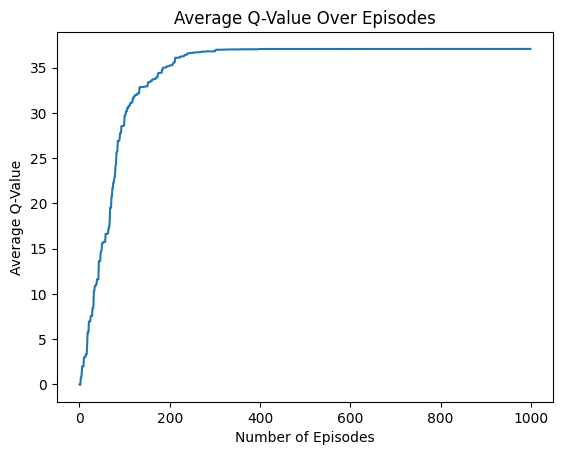


Final Q-matrix:
[[ 63.   79.   63.   63.   80.   -1.   62.2  79.   -1.   -1. ]
 [ 63.   79.   63.   64.   79.  100.   62.2  79.   -1.   -1. ]
 [ 63.   79.   63.   64.   79.   -1.   62.2  80.   -1.   -1. ]
 [ 63.   80.   64.   63.   80.   -1.   62.2  79.   -1.   -1. ]
 [ 64.   79.   63.   64.   79.  100.   62.2  79.   -1.   -1. ]
 [  0.    0.    0.    0.    0.    0.    0.    0.    0.    0. ]
 [ 63.   79.   63.   63.   79.   -1.   62.2  79.   -1.   -1. ]
 [ 63.   79.   63.   63.   79.   -1.   62.2  79.  100.   -1. ]
 [  0.    0.    0.    0.    0.    0.    0.    0.    0.    0. ]
 [  0.    0.    0.    0.    0.    0.    0.    0.    0.    0. ]]

Best path to one of the destinations: [9]


In [14]:
import random
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes
num_nodes = 10
G.add_nodes_from(range(num_nodes))

# Add edges based on your description
edges = [(1, 3), (1, 5), (2, 3), (0, 4), (4, 0), (3, 2), (3, 1), (5, 1), (3, 4), (4, 3), (4, 5), (5, 4), (5, 5),
         (2, 7), (7, 8), (8, 9), (9, 2)]
G.add_edges_from(edges)

# Specify destination nodes
destination_nodes = [5, 9, 8]

# Get the adjacency matrix
adjacency_matrix = nx.adjacency_matrix(G).todense()

# Initialize the reward matrix with -1 as null values
reward_matrix = np.full_like(adjacency_matrix, -1, dtype=float)

# Update the reward matrix based on existing edges
for edge in edges:
    start_node, end_node = edge
    action_column = end_node
    state_row = start_node
    if end_node in destination_nodes:
        reward_matrix[state_row, action_column] = 100
    else:
        reward_matrix[state_row, action_column] = 0

# Visualize the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=10, font_color="black", font_weight="bold", arrowsize=20)
nx.draw_networkx_nodes(G, pos, nodelist=destination_nodes, node_color="red", node_size=700)
plt.title("Graph with 10 Nodes and 3 Destinations")
plt.show()

# Print the reward matrix
print("Reward Matrix:")
print(reward_matrix)

# Define the number of states and actions
num_states = num_nodes
num_actions = num_nodes

# Initialize the Q-matrix with zeros
Q_matrix = np.zeros((num_states, num_actions))

# Number of episodes (you can adjust this based on your requirements)
num_episodes = 1000

# Q-learning parameters
learning_rate = 0.8
discount_factor = 0.8

# List to store the Q-matrix after each episode
q_matrix_episodes = []

# List to store the average Q-value over all states after each episode
average_q_values = []

# Q-learning algorithm
for episode in range(num_episodes):
    # Randomly select a starting state
    current_state = random.randint(0, num_states - 1)

    # Continue until reaching one of the destination states
    while current_state not in destination_nodes:
        # Randomly select an action for the current state
        action_taken = random.randint(0, num_actions - 1)

        # Get the next state (assuming a deterministic environment)
        next_state = action_taken

        # Update Q-value for the current state-action pair
        Q_matrix[current_state, action_taken] = (1 - learning_rate) * Q_matrix[current_state, action_taken] + \
                                                 learning_rate * (reward_matrix[current_state, action_taken] +
                                                                 discount_factor * np.max(Q_matrix[next_state, :]))

        # Move to the next state
        current_state = next_state

    # Append a copy of the Q-matrix after the episode for visualization
    q_matrix_episodes.append(np.copy(Q_matrix))

    # Calculate the average Q-value over all states for this episode
    average_q_values.append(np.mean(Q_matrix))

# Plot the average Q-value over all states over episodes
plt.plot(range(num_episodes), average_q_values)
plt.xlabel("Number of Episodes")
plt.ylabel("Average Q-Value")
plt.title("Average Q-Value Over Episodes")
plt.show()

# Print the final Q-matrix after training
print("\nFinal Q-matrix:")
print(Q_matrix)

# Find the best path to one of the destination nodes
current_state = random.randint(0, num_states - 1)  # Starting state
path = [current_state]

while current_state not in destination_nodes:
    # Choose the action with the highest Q-value
    action_taken = np.argmax(Q_matrix[current_state, :])

    # Get the next state based on the chosen action
    next_state = action_taken

    # Add the next state to the path
    path.append(next_state)

    # Move to the next state
    current_state = next_state

# Print the best path
print("\nBest path to one of the destinations:", path)


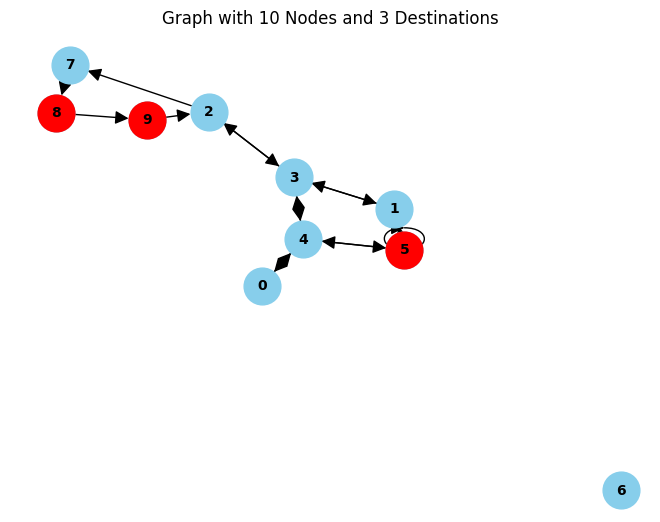

Reward Matrix:
[[ -1.  -1.  -1.  -1.   0.  -1.  -1.  -1.  -1.  -1.]
 [ -1.  -1.  -1.   0.  -1. 100.  -1.  -1.  -1.  -1.]
 [ -1.  -1.  -1.   0.  -1.  -1.  -1.   0.  -1.  -1.]
 [ -1.   0.   0.  -1.   0.  -1.  -1.  -1.  -1.  -1.]
 [  0.  -1.  -1.   0.  -1. 100.  -1.  -1.  -1.  -1.]
 [ -1.   0.  -1.  -1.   0. 100.  -1.  -1.  -1.  -1.]
 [ -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.]
 [ -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1. 100.  -1.]
 [ -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1. 100.]
 [ -1.  -1.   0.  -1.  -1.  -1.  -1.  -1.  -1.  -1.]]


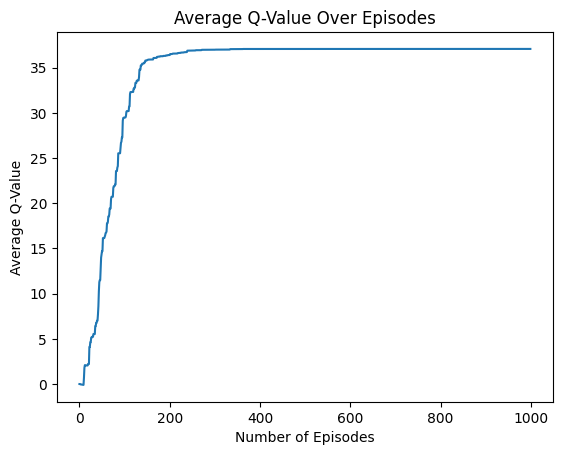


Final Q-matrix:
[[ 63.          79.          63.          63.          80.
   -1.          62.2         79.          -1.          -1.        ]
 [ 63.          79.          63.          64.          79.
  100.          62.2         79.          -1.          -1.        ]
 [ 63.          79.          63.          64.          79.
   -1.          62.2         80.          -1.          -1.        ]
 [ 63.          80.          64.          63.          80.
   -1.          62.2         79.          -1.          -1.        ]
 [ 64.          79.          63.          64.          79.
  100.          62.2         79.          -1.          -1.        ]
 [  0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.        ]
 [ 63.          79.          63.          63.          79.
   -1.          62.2         78.99999998  -1.          -1.        ]
 [ 63.          79.          63.          63.          79.
   -1.          62.2         79.   

In [16]:
import random
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes
num_nodes = 10
G.add_nodes_from(range(num_nodes))

# Add edges based on your description
edges = [(1, 3), (1, 5), (2, 3), (0, 4), (4, 0), (3, 2), (3, 1), (5, 1), (3, 4), (4, 3), (4, 5), (5, 4), (5, 5),
         (2, 7), (7, 8), (8, 9), (9, 2)]
G.add_edges_from(edges)

# Specify destination nodes
destination_nodes = [5, 9, 8]

# Get the adjacency matrix
adjacency_matrix = nx.adjacency_matrix(G).todense()

# Initialize the reward matrix with -1 as null values
reward_matrix = np.full_like(adjacency_matrix, -1, dtype=float)

# Update the reward matrix based on existing edges
for edge in edges:
    start_node, end_node = edge
    action_column = end_node
    state_row = start_node
    if end_node in destination_nodes:
        reward_matrix[state_row, action_column] = 100
    else:
        reward_matrix[state_row, action_column] = 0

# Visualize the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=10, font_color="black", font_weight="bold", arrowsize=20)
nx.draw_networkx_nodes(G, pos, nodelist=destination_nodes, node_color="red", node_size=700)
plt.title("Graph with 10 Nodes and 3 Destinations")
plt.show()

# Print the reward matrix
print("Reward Matrix:")
print(reward_matrix)

# Define the number of states and actions
num_states = num_nodes
num_actions = num_nodes

# Initialize the Q-matrix with zeros
Q_matrix = np.zeros((num_states, num_actions))

# Number of episodes (you can adjust this based on your requirements)
num_episodes = 1000

# Q-learning parameters
learning_rate = 0.8
discount_factor = 0.8

# List to store the Q-matrix after each episode
q_matrix_episodes = []
average_q_values = []

# Q-learning algorithm
for episode in range(num_episodes):
    current_state = random.randint(0, num_states - 1)

    while current_state not in destination_nodes:
        action_taken = random.randint(0, num_actions - 1)
        next_state = action_taken

        Q_matrix[current_state, action_taken] = (1 - learning_rate) * Q_matrix[current_state, action_taken] + \
                                                 learning_rate * (reward_matrix[current_state, action_taken] +
                                                                 discount_factor * np.max(Q_matrix[next_state, :]))

        current_state = next_state

    q_matrix_episodes.append(np.copy(Q_matrix))
    average_q_values.append(np.mean(Q_matrix))

# Plot the average Q-value over all states over episodes
plt.plot(range(num_episodes), average_q_values)
plt.xlabel("Number of Episodes")
plt.ylabel("Average Q-Value")
plt.title("Average Q-Value Over Episodes")
plt.show()

# Print the final Q-matrix after training
print("\nFinal Q-matrix:")
print(Q_matrix)

# Find the best path to one of the destination nodes
starting_node = 1  # Specify the starting node
current_state = starting_node
path = [current_state]

while current_state not in destination_nodes:
    action_taken = np.argmax(Q_matrix[current_state, :])
    next_state = action_taken
    path.append(next_state)
    current_state = next_state

# Print the best path
print("\nBest path from node {} to one of the destinations:".format(starting_node), path)
